## Dynamic risk parity portfolio with independent components

### Exploring the feasibility

In [1]:
eur_usd <- readxl::read_excel("score_data.xlsx", sheet = 1,
                              col_types = c("text", "numeric",
                                            "numeric", "numeric", "numeric"))
eur_usd$date <- as.Date(eur_usd$date)
eur_usd <- eur_usd[order(eur_usd$date), ]

gbp_usd <- readxl::read_excel("score_data.xlsx", sheet = 2,
                              col_types = c("text", "numeric",
                                            "numeric", "numeric", "numeric"))
gbp_usd$date <- as.Date(gbp_usd$date)
gbp_usd <- gbp_usd[order(gbp_usd$date), ]


data <- as.data.frame(cbind(eur_usd$close, gbp_usd$close))
data <- cbind(eur_usd$date, data)
colnames(data) <- c("date", "euro", "gbp")


returns <- as.data.frame(cbind(diff(log(data$euro)), diff(log(data$gbp))))
returns <- cbind(data$date[2:4956], returns)
colnames(returns) <- c("date", "euro", "gbp")
returns$euro <- returns$euro - mean(returns$euro)
returns$gbp <- returns$gbp - mean(returns$gbp)

use_data <- cbind("euro" = returns$euro, "gbp" = returns$gbp)

In [2]:
obj_spec <- BEKKs::bekk_spec()
x1 <- BEKKs::bekk_fit(obj_spec, use_data, QML_t_ratios = TRUE)

summary(x1)

residuals <- x1$e_t


BEKK estimation results
-----------------------
Log-likelihood: 38932.9
BEKK model stationary: TRUE
Number of BHHH iterations: 16
AIC: -77846.8
BIC: -77836.28
Estimated parameter matrices: 

C 
             [,1]         [,2]
[1,] 0.0003248215 0.0000000000
[2,] 0.0003345089 0.0003648545

A 
           [,1]        [,2]
[1,] 0.14277107 -0.05119239
[2,] 0.01691992  0.22838482

G 
             [,1]       [,2]
[1,]  0.990045597 0.01128332
[2,] -0.005566672 0.96897109

Standard errors of parameter matrices: 

C 
             [,1]         [,2]
[1,] 8.499743e-05 0.000000e+00
[2,] 1.801753e-04 6.719683e-05

A 
           [,1]       [,2]
[1,] 0.03539590 0.04854348
[2,] 0.05985017 0.07810173

G 
            [,1]        [,2]
[1,] 0.006912313 0.009294084
[2,] 0.013014520 0.017580439



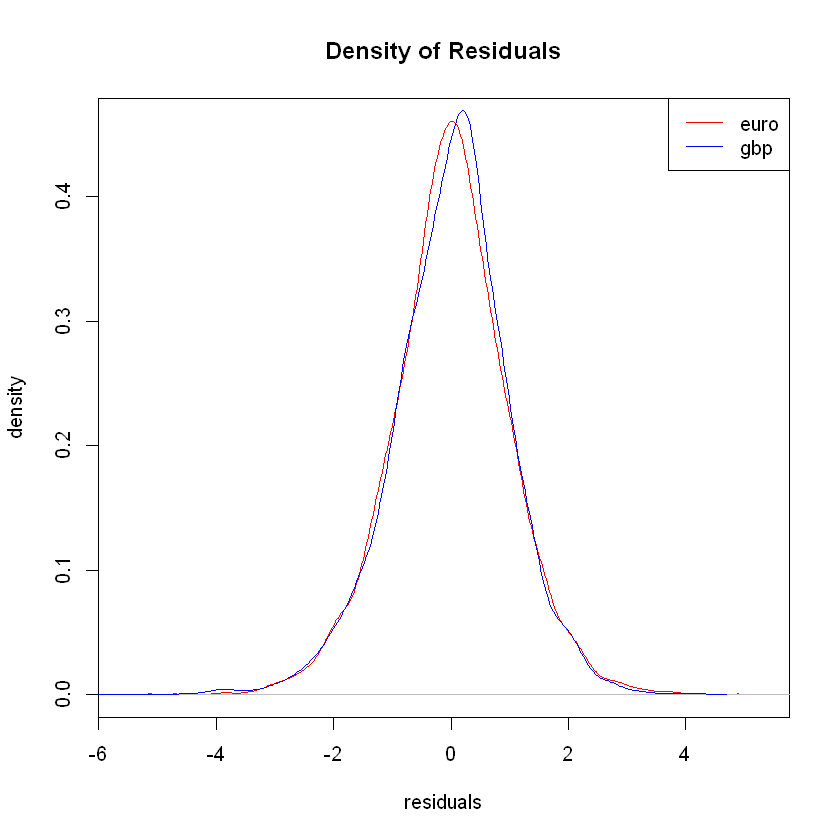

In [11]:
plot(density(residuals[, 1]), col = "red", main = "Density of Residuals",
     xlab = "residuals", ylab = "density")

lines(density(residuals[, 2]), col = "blue")
legend("topright", legend = c("euro", "gbp"), col = c("red", "blue"), lty = 1)